# Data Exploration, Cleaning and Wrangling

This Jupyter Notebook, when necessary, explores and cleans the dataset, and presents some preliminary visualisations. I analyse whether the visualisations presented below have the necessary quality and visual appeal to be used in the Medium Post. I conclude that not, and therefore use Tableau instead to create the visualisations. 

#### Import libraries 

In [60]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime


#### This is a data set of the recent of evolution of Berlin's tree stock. "Gesamtbestand 1.1" refers to the number of trees at the start of the year. After the computation of "Neupflanzungen" (new trees planted) and "Fällungen" (felled trees), the number of trees at the end of the year ("Gesamtbestand 31.12.") is obtained. I find that the total number of trees in Berlin has been falling.

In [61]:
# load csv into pandas dataframe
df_trees = pd.read_csv('trees.csv')
df_trees.head()

,Jahr,Gesamtbestand 1.1,Neupflanzungen,Fällungen,Bestandskorrekturen,Gesamtbestand 31.12.,Bestandsveränderung (Fällungen/Neupflanzungen)
0,2010.0,434.371,2.717,3.782,2.370,435.676,-1.065
1,2011.0,435.676,3.681,4.146,3.695,438.906,-465.000
2,2012.0,438.740,2.740,4.594,3.085,439.971,-1.854
3,2013.0,439.971,2.395,3.999,-403.000,437.964,-1.604
4,2014.0,437.964,2.349,4.437,3.319,439.195,-2.088


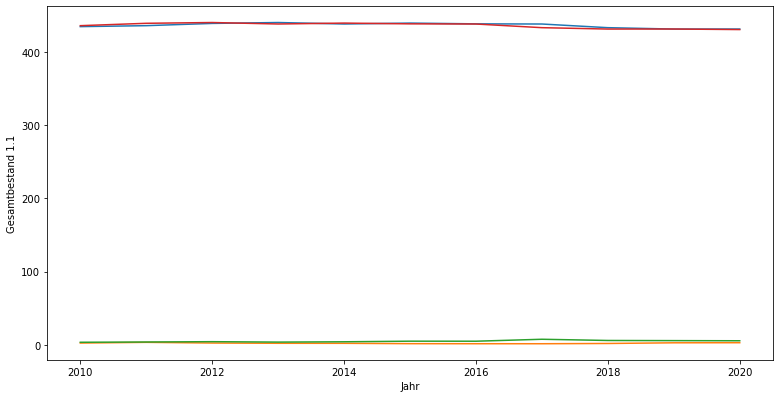

In [62]:
# One possibility is to plot like this. It is not attractive.
plt.figure(figsize=(13, 6.5))
e = sns.lineplot(data=df_trees, x="Jahr", y="Gesamtbestand 1.1")
f = sns.lineplot(data=df_trees, x="Jahr", y="Neupflanzungen")
g = sns.lineplot(data=df_trees, x="Jahr", y="Fällungen")
h = sns.lineplot(data=df_trees, x="Jahr", y="Gesamtbestand 31.12.")


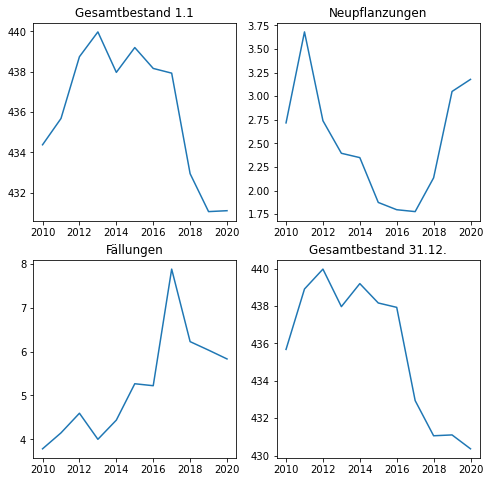

In [63]:
# Another is to plot with subplots, which is also dull.
fig,a =  plt.subplots(2,2, figsize=(8,8))
x = df_trees['Jahr']
a[0][0].plot(x,df_trees['Gesamtbestand 1.1'])
a[0][0].set_title('Gesamtbestand 1.1')
a[0][1].plot(x,df_trees['Neupflanzungen'])
a[0][1].set_title('Neupflanzungen')
a[1][0].plot(x,df_trees['Fällungen'])
a[1][0].set_title('Fällungen')
a[1][1].plot(x,df_trees['Gesamtbestand 31.12.'])
a[1][1].set_title('Gesamtbestand 31.12.')
plt.show()

#### This is a data set of the annual average precipitation in Berlin, from 1876 to 2021. It has been obtained from the KNMI Climate Explorer.

In [64]:
# The first step is to import the data
df_precipitation = pd.read_csv('precipitation.txt', delimiter = " ")
df_precipitation

,Unnamed: 0,Year,Unnamed: 2,Unnamed: 3,[mm/day],annual\tmean,of,24-hr,summed,precipitation
0,NaN,1876,NaN,NaN,1.743716,NaN,NaN,NaN,NaN,NaN
1,NaN,1877,NaN,NaN,1.738630,NaN,NaN,NaN,NaN,NaN
2,NaN,1878,NaN,NaN,1.526027,NaN,NaN,NaN,NaN,NaN
3,NaN,1879,NaN,NaN,1.564110,NaN,NaN,NaN,NaN,NaN
4,NaN,1880,NaN,NaN,1.600546,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
139,NaN,2016,NaN,NaN,1.325777,NaN,NaN,NaN,NaN,NaN
140,NaN,2017,NaN,NaN,2.199542,NaN,NaN,NaN,NaN,NaN
141,NaN,2018,NaN,NaN,1.076669,NaN,NaN,NaN,NaN,NaN
142,NaN,2019,NaN,NaN,1.412427,NaN,NaN,NaN,NaN,NaN


In [65]:
#Here I drop the unnecessary columns, as the data came in a messy format 
df_precipitation2 = df_precipitation.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'annual\tmean', 'of', '24-hr', 'summed', 'precipitation'], axis=1)
df_precipitation2.head()

,Year,[mm/day]
0,1876,1.743716
1,1877,1.738630
2,1878,1.526027
3,1879,1.564110
4,1880,1.600546


In [66]:
#In this step i change the main column's name
df_precipitation2 = df_precipitation2.rename(columns={'[mm/day]': 'Annual mean of 24-hr summed precipitation (mm/day)'
                        })
# check if that worked
df_precipitation2.head()

,Year,Annual mean of 24-hr summed precipitation (mm/day)
0,1876,1.743716
1,1877,1.738630
2,1878,1.526027
3,1879,1.564110
4,1880,1.600546


#### This is a data set of the annual average temperature in Berlin, from 1876 to 2021. It has been obtained from the KNMI Climate Explorer.

In [67]:
# The first step is to import the data. 
df_temperature = pd.read_csv('temperature.txt', delimiter = "  ")
# The second is to change the main column's name
df_temperature = df_temperature.rename(columns={' Annual mean of daily mean temperature (Celsius)': 'Annual mean of daily mean temperature (Celsius)'
                        })
df_temperature.head()

<ipython-input-67-0b58bad2cd6a>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_temperature = pd.read_csv('temperature.txt', delimiter = "  ")


,Year,Annual mean of daily mean temperature (Celsius)
0,1876,9.320219
1,1877,9.727944
2,1878,10.236710
3,1879,8.180549
4,1880,9.805191


#### Here I join the two last dataframes into a single one

In [68]:
df_precipitation_temperature = pd.merge(df_precipitation2, df_temperature, on="Year")
df_precipitation_temperature 

,Year,Annual mean of 24-hr summed precipitation (mm/day),Annual mean of daily mean temperature (Celsius)
0,1876,1.743716,9.320219
1,1877,1.738630,9.727944
2,1878,1.526027,10.236710
3,1879,1.564110,8.180549
4,1880,1.600546,9.805191
...,...,...,...
139,2016,1.325777,10.456640
140,2017,2.199542,10.328610
141,2018,1.076669,11.370640
142,2019,1.412427,11.534940


#### Below I plot both in a single graph. While the graph is functional for the story I want to tell, I think that I could do it better. I settle with Tableau for creating the visualisations.

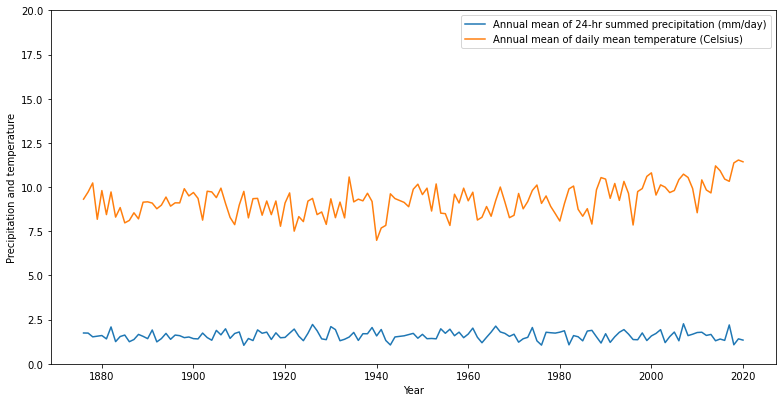

In [70]:
plt.figure(figsize=(13, 6.5))
c = sns.lineplot(data=df_precipitation_temperature, x="Year", y="Annual mean of 24-hr summed precipitation (mm/day)")
d = sns.lineplot(data=df_precipitation_temperature, x="Year", y="Annual mean of daily mean temperature (Celsius)")
c.set(ylim=(0, 20))
d.set(ylim=(0, 20))
c.set(xlabel='Year', ylabel='Precipitation and temperature')
d.legend(['Annual mean of 24-hr summed precipitation (mm/day)', 'Annual mean of daily mean temperature (Celsius)'])

#### The last data set is obtained from a database of 766,000 trees from Berlin.

In [71]:
# The first step is to import the data
df_treesdb = pd.read_csv('trees_from_berlin.csv', low_memory=False)
df_treesdb.head()

,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,Hausnr. Zusatz,Pflanzjahr,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk
0,00008100:0020ebb5,81,00451,Bayernallee,Eiche 'Fastigiata Koster',Quercus robur 'Fastigiata Koster',QUERCUS,Bayernallee,33/A,-,2018,3.00,1.00,20.00,3.00,Charlottenburg-Wilmersdorf
1,00008100:0020ebb6,82,00451,Bayernallee,Eiche 'Fastigiata Koster',Quercus robur 'Fastigiata Koster',QUERCUS,Bayernallee,33A,-,2018,3.00,1.00,20.00,3.00,Charlottenburg-Wilmersdorf
2,00008100:00203278,78,04407,Tannenbergallee,Pyramiden-Hainbuche,Carpinus betulus 'Fastigiata',CARPINUS,Tannenbergallee,4A,-,2015,6.00,1.00,23.00,5.00,Charlottenburg-Wilmersdorf
3,00008100:00203277,135,02899,Lyckallee,Winter-Linde 'Greenspire',Tilia cordata 'Greenspire',TILIA,Lyckallee,18,-,2015,6.00,1.00,20.00,3.00,Charlottenburg-Wilmersdorf
4,00008100:00202f80,79,01046,Düsseldorfer Str.,Kugel-Winter-Linde 'Green Globe',Tilia cordata 'Green Globe',TILIA,Düsseldorfer Straße,3,-,2015,6.00,2.00,27.00,5.00,Charlottenburg-Wilmersdorf


#### Here I plot the distribution of the category "Gattung botanisch" (Botanical genus). While it is doable, the visualisation is not informative.

<AxesSubplot:xlabel='Gattung botanisch', ylabel='Count'>

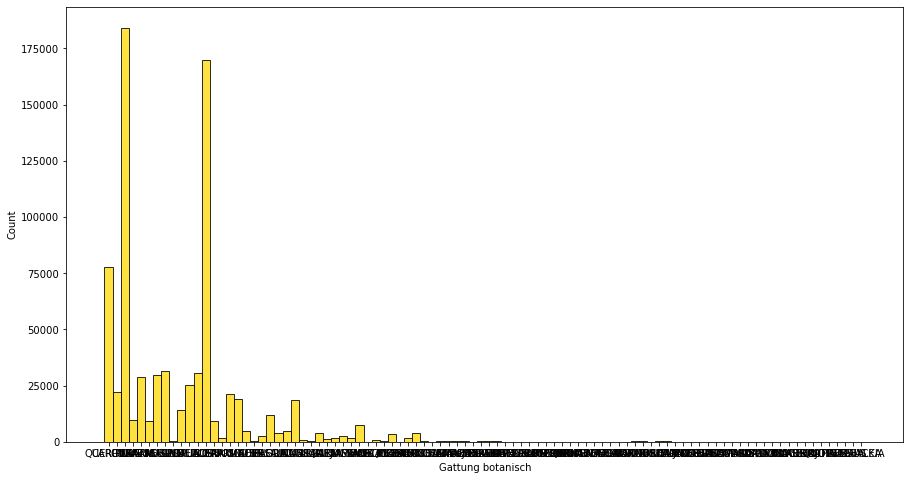

In [72]:
plt.figure(figsize=(15, 8))
sns.histplot(x=df_treesdb["Gattung botanisch"] , color="gold")

#### Another possibility is to work with bins to analyse the distribution of the trees' ages.  

In [73]:
# In this step I create the bins using "pd.cut"
df_treesdb = df_treesdb.apply(pd.to_numeric, errors="coerce")
size_bin = ['A', 'B', 'C', 'D', 'E']
df_treesdb['Standalter'] = pd.cut(df_treesdb['Standalter'], bins=[0, 1.5, 10, 30, 100, 200], labels=size_bin)
df_treesdb['Standalter'].value_counts()

C    318655
D    283060
B    131157
E     10145
A      3320
Name: Standalter, dtype: int64

<AxesSubplot:xlabel='Standalter', ylabel='count'>

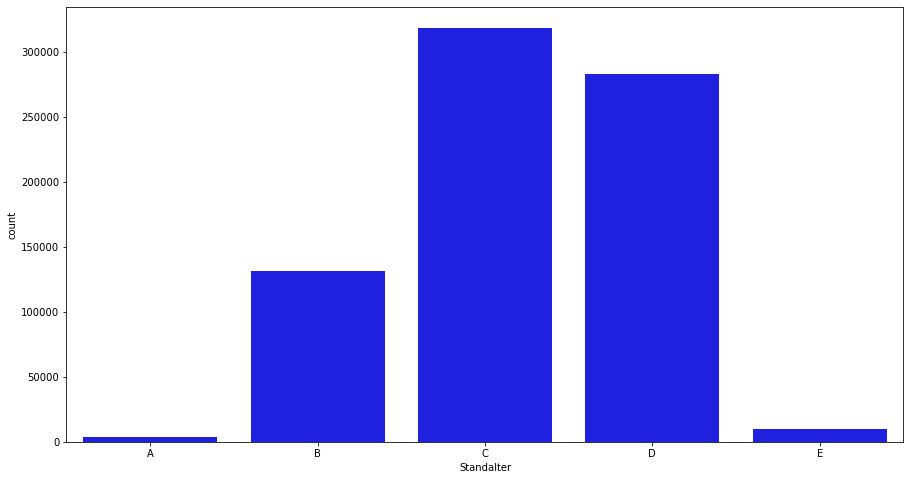

In [77]:
# This is the visualisation with the obtained bins. It is informative (by telling that most trees have a middle age) but does not suit what I want to do.
plt.figure(figsize=(15, 8))
sns.countplot(x=df_treesdb["Standalter"] , color="blue")

### I decide to create all the visualisations needed for the story in Tableau. They can be found here: https://public.tableau.com/profile/francisco.ebeling#!/